In [1]:
import sys

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import time

sys.path.append('../utils')
import data_paths
from hbefa_hot_emissions import HbefaHotEmissions
from hot_emission_process import process_hourly_emissions
from traffic_counts import TrafficCounts

In [4]:
# initialize hbefa 
hbefa_obj = HbefaHotEmissions()
# initialize traffic cycles
cycles = TrafficCounts()
# import visum data
visum_links = gpd.read_file(data_paths.VISUM_FOLDER_PATH + 'visum_links.gpkg')

Loaded emission factors from /Users/daniel_tum/Documents/projects/traffic inventory v2/traffic-emission-inventory/data/restricted_input/hbefa/EFA_HOT_Vehcat_PC.XLS
Loaded emission factors from /Users/daniel_tum/Documents/projects/traffic inventory v2/traffic-emission-inventory/data/restricted_input/hbefa/EFA_HOT_Vehcat_LCV.XLS
Loaded emission factors from /Users/daniel_tum/Documents/projects/traffic inventory v2/traffic-emission-inventory/data/restricted_input/hbefa/EFA_HOT_Vehcat_HGV.XLS
Loaded emission factors from /Users/daniel_tum/Documents/projects/traffic inventory v2/traffic-emission-inventory/data/restricted_input/hbefa/EFA_HOT_Vehcat_Coach.XLS
Loaded emission factors from /Users/daniel_tum/Documents/projects/traffic inventory v2/traffic-emission-inventory/data/restricted_input/hbefa/EFA_HOT_Vehcat_MOT.XLS
Loaded emission factors from /Users/daniel_tum/Documents/projects/traffic inventory v2/traffic-emission-inventory/data/restricted_input/hbefa/ef_aggregated_los/EFA_HOT_Vehcat

In [2]:
# import detector emission data
_fname = data_paths.INVENTORY_FOLDER_PATH + 'detector_emissions_v_ts.feather'
df = pd.read_feather(_fname)

In [5]:
road_links_with_detectors = df['road_link_id'].unique()
visum_reduced = visum_links[visum_links['road_link_id']\
    .isin(road_links_with_detectors)].copy()
visum_reduced = visum_reduced.reset_index(drop=True).reset_index()

In [30]:
links = visum_reduced[visum_reduced['road_type']=='TrunkRoad/Primary-City'].road_link_id.unique()

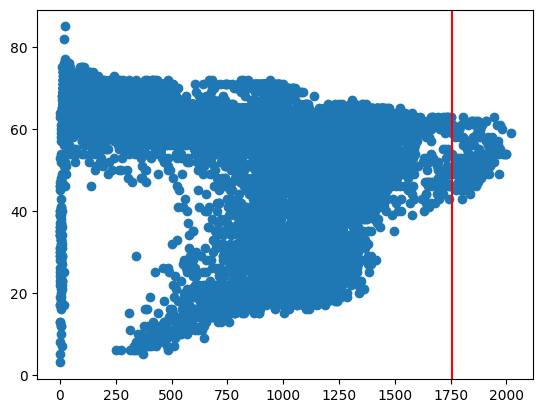

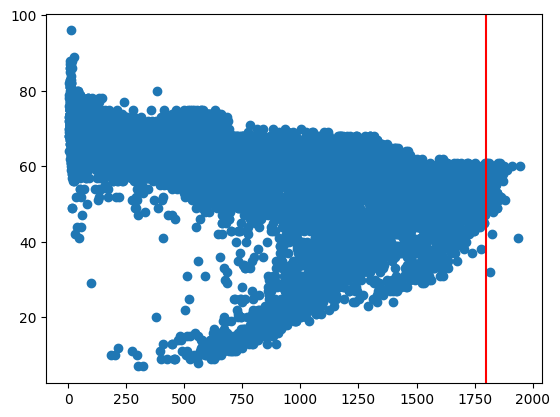

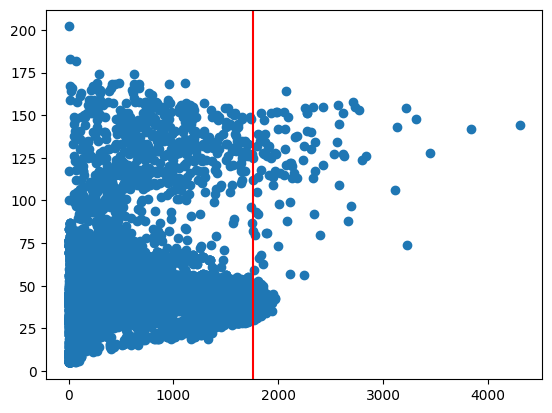

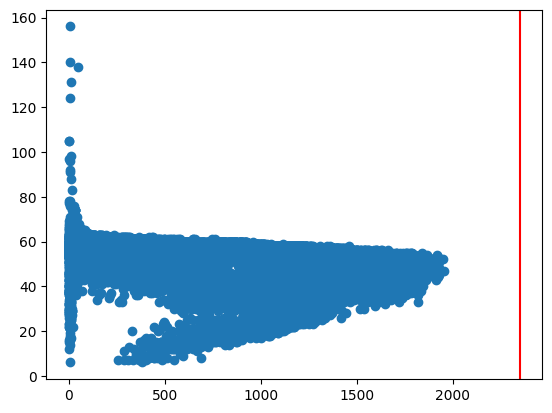

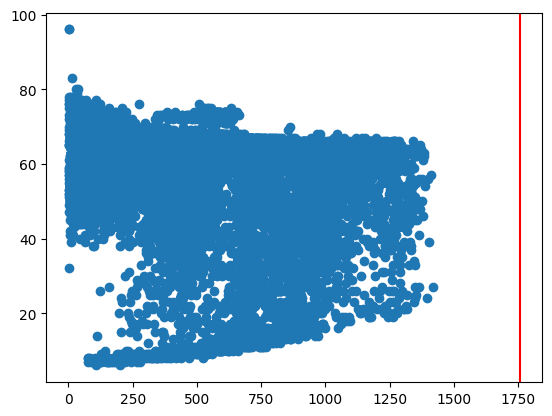

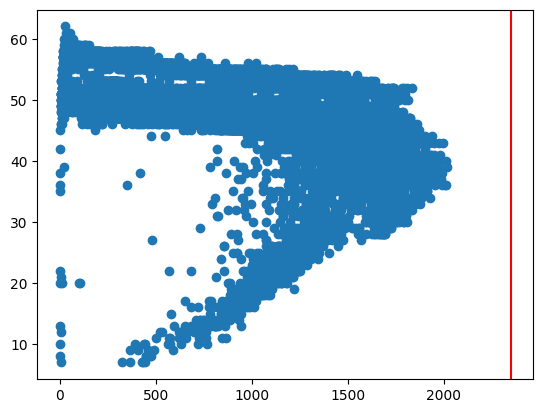

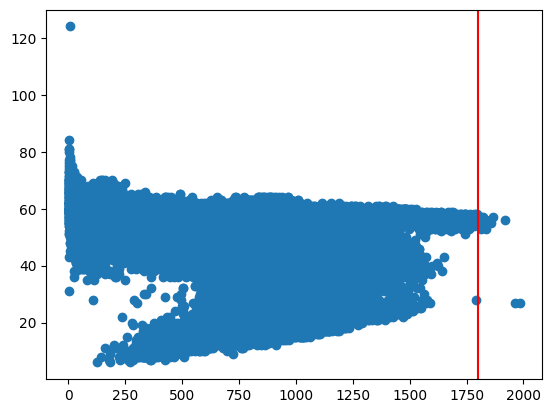

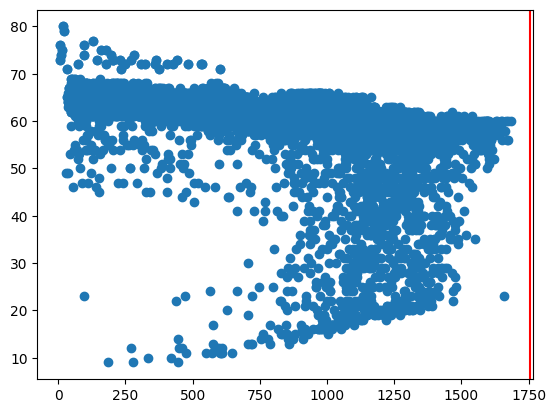

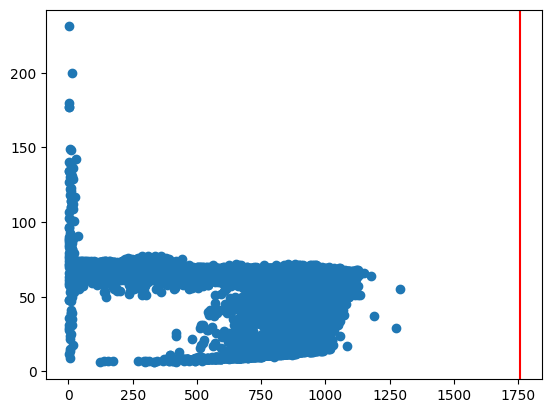

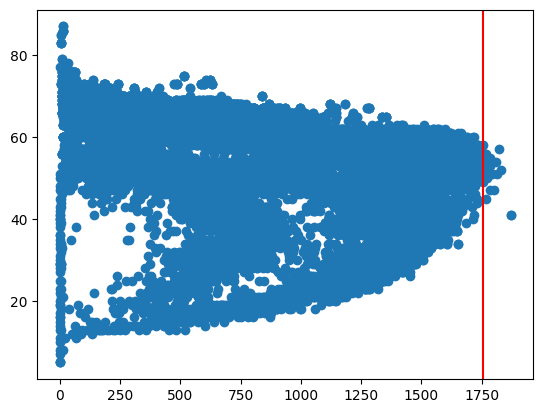

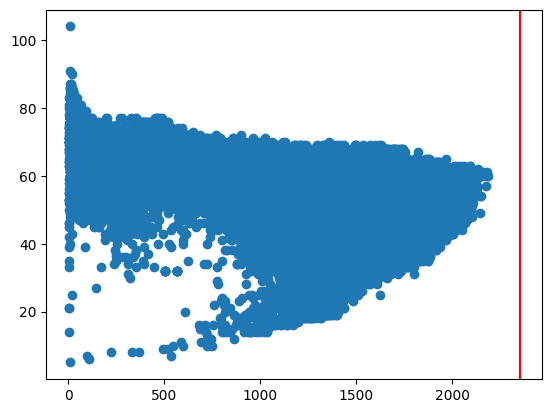

In [32]:

for link_id in links:
    capacity = visum_reduced[visum_reduced['road_link_id'] == link_id]['hour_capacity'].iloc[0]
    lanes = visum_reduced[visum_reduced['road_link_id'] == link_id]['lanes'].iloc[0]

    capacity_per_lane = capacity/lanes
    plt.figure()
    plt.scatter(y=df[df['road_link_id'] == link_id]['measured_speed'], x=df[df['road_link_id'] == link_id]['SUM_PCU'])
    plt.axvline(capacity_per_lane, color='red')